In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importando bibliotecas necessárias
import pandas as pd
import numpy as np
import orchest
import os

In [3]:
df = pd.read_csv('results.csv')

In [4]:
df.head

<bound method NDFrame.head of              date home_team away_team  home_score  away_score tournament  \
0      1872-11-30  Scotland   England         0.0         0.0   Friendly   
1      1873-03-08   England  Scotland         4.0         2.0   Friendly   
2      1874-03-07  Scotland   England         2.0         1.0   Friendly   
3      1875-03-06   England  Scotland         2.0         2.0   Friendly   
4      1876-03-04  Scotland   England         3.0         0.0   Friendly   
...           ...       ...       ...         ...         ...        ...   
47121  2024-07-06       NaN       NaN         NaN         NaN  UEFA Euro   
47122  2024-07-06       NaN       NaN         NaN         NaN  UEFA Euro   
47123  2024-07-09       NaN       NaN         NaN         NaN  UEFA Euro   
47124  2024-07-10       NaN       NaN         NaN         NaN  UEFA Euro   
47125  2024-07-14       NaN       NaN         NaN         NaN  UEFA Euro   

             city   country  neutral  
0         Glasgow 

In [5]:
df["date"] = pd.to_datetime(df["date"])

In [6]:
df.isna().sum()

date           0
home_team     15
away_team     15
home_score    51
away_score    51
tournament     0
city           0
country        0
neutral        0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score           float64
away_score           float64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

In [9]:
df.sort_values("date").tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
47044,2024-03-26,Tajikistan,Saudi Arabia,1.0,1.0,FIFA World Cup qualification,Dushanbe,Tajikistan,False
47045,2024-03-26,Jordan,Pakistan,7.0,0.0,FIFA World Cup qualification,Amman,Jordan,False
47046,2024-03-26,Bahrain,Nepal,3.0,0.0,FIFA World Cup qualification,Riffa,Bahrain,False
47048,2024-03-26,Bangladesh,Palestine,0.0,1.0,FIFA World Cup qualification,Dhaka,Bangladesh,False
47074,2024-03-26,Finland,Estonia,2.0,1.0,Friendly,Helsinki,Finland,False


In [10]:
df = df[(df["date"] >= "2021-7-11")].reset_index(drop=True)

In [11]:
df.home_team.value_counts()

home_team
United States       37
Mexico              36
Bahrain             34
Qatar               34
Morocco             31
                    ..
Elba Island          1
West Papua           1
Saint Barthélemy     1
Ticino               1
American Samoa       1
Name: count, Length: 249, dtype: int64

In [12]:
rank = pd.read_csv('fifa_ranking-2024-04-04.csv')

In [13]:
rank["rank_date"] = pd.to_datetime(rank["rank_date"])
rank = rank[(rank["rank_date"] >= "2021-7-11")].reset_index(drop=True)

In [14]:
rank["country_full"] = rank["country_full"].str.replace("IR Iran", "Iran").str.replace("Korea Republic", "South Korea").str.replace("USA", "United States")

In [15]:
rank = rank.set_index(['rank_date']).groupby(['country_full'], group_keys=False).resample('D').first().fillna(method='ffill').reset_index()

In [16]:
df_wc_ranked = df.merge(rank[["country_full", "total_points", "previous_points", "rank", "rank_change", "rank_date"]], left_on=["date", "home_team"], right_on=["rank_date", "country_full"]).drop(["rank_date", "country_full"], axis=1)

df_wc_ranked = df_wc_ranked.merge(rank[["country_full", "total_points", "previous_points", "rank", "rank_change", "rank_date"]], left_on=["date", "away_team"], right_on=["rank_date", "country_full"], suffixes=("_home", "_away")).drop(["rank_date", "country_full"], axis=1)

In [17]:
df_wc_ranked[(df_wc_ranked.home_team == "Brazil") | (df_wc_ranked.away_team == "Brazil")].tail(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_points_home,previous_points_home,rank_home,rank_change_home,total_points_away,previous_points_away,rank_away,rank_change_away
1600,2023-06-17,Brazil,Guinea,4.0,1.0,Friendly,Barcelona,Spain,True,1834.21,1840.77,3.0,2.0,1305.92,1290.47,79.0,-4.0
1655,2023-06-20,Brazil,Senegal,2.0,4.0,Friendly,Lisbon,Portugal,True,1834.21,1840.77,3.0,2.0,1613.21,1603.98,18.0,-1.0
1789,2023-09-08,Brazil,Bolivia,5.0,1.0,FIFA World Cup qualification,Belém,Brazil,False,1828.27,1828.27,3.0,0.0,1295.09,1295.09,83.0,0.0
1857,2023-09-12,Peru,Brazil,0.0,1.0,FIFA World Cup qualification,Lima,Peru,False,1561.20,1561.20,21.0,0.0,1828.27,1828.27,3.0,0.0
1900,2023-10-12,Brazil,Venezuela,1.0,1.0,FIFA World Cup qualification,Cuiabá,Brazil,False,1837.61,1828.27,3.0,0.0,1422.83,1417.23,53.0,-4.0
1996,2023-10-17,Uruguay,Brazil,2.0,0.0,FIFA World Cup qualification,Montevideo,Uruguay,False,1626.51,1633.13,17.0,1.0,1837.61,1828.27,3.0,0.0
2045,2023-11-16,Colombia,Brazil,2.0,1.0,FIFA World Cup qualification,Barranquilla,Colombia,False,1626.60,1629.60,17.0,1.0,1812.20,1837.61,3.0,0.0
2154,2023-11-21,Brazil,Argentina,0.0,1.0,FIFA World Cup qualification,Rio de Janeiro,Brazil,False,1812.20,1837.61,3.0,0.0,1861.29,1851.41,1.0,0.0
2396,2024-03-23,England,Brazil,0.0,1.0,Friendly,London,England,False,1800.05,1800.05,3.0,0.0,1784.09,1784.09,5.0,0.0
2461,2024-03-26,Spain,Brazil,3.0,3.0,Friendly,Madrid,Spain,False,1732.64,1732.64,8.0,0.0,1784.09,1784.09,5.0,0.0


In [18]:
df = df_wc_ranked

In [19]:
def result_finder(home, away):
    if home > away:
        return pd.Series([0, 3, 0])
    if home < away:
        return pd.Series([1, 0, 3])
    else:
        return pd.Series([2, 1, 1])

results = df.apply(lambda x: result_finder(x["home_score"], x["away_score"]), axis=1)

In [20]:
df[["result", "home_team_points", "away_team_points"]] = results

In [21]:
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.2/162.2 kB 16.9 MB/s eta 0:00:00


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 185.0 MB/s eta 0:00:00


   ━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/9.2 MB 55.1 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━ 4.7/9.2 MB 64.8 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 85.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.1/301.1 kB 217.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/4.7 MB ? eta -:--:--

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 149.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/1.2 MB ? eta -:--:--

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 188.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 162.4 MB/s eta 0:00:00


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

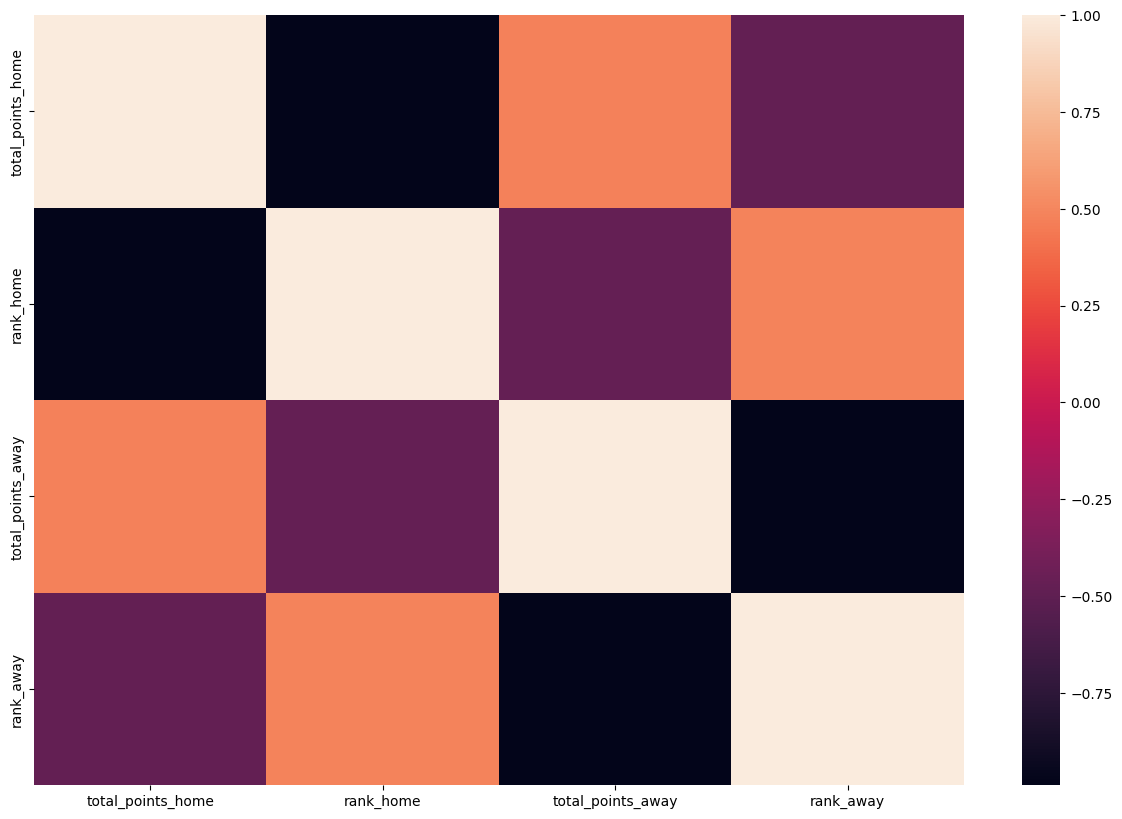

In [23]:
plt.figure(figsize=(15, 10))
sns.heatmap(df[["total_points_home", "rank_home", "total_points_away", "rank_away"]].corr())
plt.show()

In [24]:
df["rank_dif"] = df["rank_home"] - df["rank_away"]
df["sg"] = df["home_score"] - df["away_score"]
df["points_home_by_rank"] = df["home_team_points"]/df["rank_away"]
df["points_away_by_rank"] = df["away_team_points"]/df["rank_home"]

In [25]:
home_team = df[["date", "home_team", "home_score", "away_score", "rank_home", "rank_away","rank_change_home", "total_points_home", "result", "rank_dif", "points_home_by_rank", "home_team_points"]]

away_team = df[["date", "away_team", "away_score", "home_score", "rank_away", "rank_home","rank_change_away", "total_points_away", "result", "rank_dif", "points_away_by_rank", "away_team_points"]]

In [26]:
home_team.columns = [h.replace("home_", "").replace("_home", "").replace("away_", "suf_").replace("_away", "_suf") for h in home_team.columns]

away_team.columns = [a.replace("away_", "").replace("_away", "").replace("home_", "suf_").replace("_home", "_suf") for a in away_team.columns]

In [27]:
team_stats = pd.concat([home_team, away_team])

In [28]:
#this column will be used to calculate features for simulation
team_stats_raw = team_stats.copy()

In [29]:
stats_val = []

for index, row in team_stats.iterrows():
    team = row["team"]
    date = row["date"]
    past_games = team_stats.loc[(team_stats["team"] == team) & (team_stats["date"] < date)].sort_values(by=['date'], ascending=False)
    last5 = past_games.head(5)
    
    goals = past_games["score"].mean()
    goals_l5 = last5["score"].mean()
    
    goals_suf = past_games["suf_score"].mean()
    goals_suf_l5 = last5["suf_score"].mean()
    
    rank = past_games["rank_suf"].mean()
    rank_l5 = last5["rank_suf"].mean()
    
    if len(last5) > 0:
        points = past_games["total_points"].values[0] - past_games["total_points"].values[-1]#qtd de pontos ganhos
        points_l5 = last5["total_points"].values[0] - last5["total_points"].values[-1] 
    else:
        points = 0
        points_l5 = 0
        
    gp = past_games["team_points"].mean()
    gp_l5 = last5["team_points"].mean()
    
    gp_rank = past_games["points_by_rank"].mean()
    gp_rank_l5 = last5["points_by_rank"].mean()
    
    stats_val.append([goals, goals_l5, goals_suf, goals_suf_l5, rank, rank_l5, points, points_l5, gp, gp_l5, gp_rank, gp_rank_l5])

In [30]:
stats_cols = ["goals_mean", "goals_mean_l5", "goals_suf_mean", "goals_suf_mean_l5", "rank_mean", "rank_mean_l5", "points_mean", "points_mean_l5", "game_points_mean", 
              "game_points_mean_l5", "game_points_rank_mean", "game_points_rank_mean_l5"]

stats_df = pd.DataFrame(stats_val, columns=stats_cols)

full_df = pd.concat([team_stats.reset_index(drop=True), stats_df], axis=1, ignore_index=False)

In [31]:
home_team_stats = full_df.iloc[:int(full_df.shape[0]/2),:]
away_team_stats = full_df.iloc[int(full_df.shape[0]/2):,:]

In [32]:
home_team_stats.columns[-12:]

Index(['goals_mean', 'goals_mean_l5', 'goals_suf_mean', 'goals_suf_mean_l5',
       'rank_mean', 'rank_mean_l5', 'points_mean', 'points_mean_l5',
       'game_points_mean', 'game_points_mean_l5', 'game_points_rank_mean',
       'game_points_rank_mean_l5'],
      dtype='object')

In [33]:
home_team_stats = home_team_stats[home_team_stats.columns[-12:]]
away_team_stats = away_team_stats[away_team_stats.columns[-12:]]

In [34]:
home_team_stats.columns = ['home_'+str(col) for col in home_team_stats.columns]
away_team_stats.columns = ['away_'+str(col) for col in away_team_stats.columns]

In [35]:
match_stats = pd.concat([home_team_stats, away_team_stats.reset_index(drop=True)], axis=1, ignore_index=False)

In [36]:
full_df = pd.concat([df, match_stats.reset_index(drop=True)], axis=1, ignore_index=False)

In [37]:
full_df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'total_points_home',
       'previous_points_home', 'rank_home', 'rank_change_home',
       'total_points_away', 'previous_points_away', 'rank_away',
       'rank_change_away', 'result', 'home_team_points', 'away_team_points',
       'rank_dif', 'sg', 'points_home_by_rank', 'points_away_by_rank',
       'home_goals_mean', 'home_goals_mean_l5', 'home_goals_suf_mean',
       'home_goals_suf_mean_l5', 'home_rank_mean', 'home_rank_mean_l5',
       'home_points_mean', 'home_points_mean_l5', 'home_game_points_mean',
       'home_game_points_mean_l5', 'home_game_points_rank_mean',
       'home_game_points_rank_mean_l5', 'away_goals_mean',
       'away_goals_mean_l5', 'away_goals_suf_mean', 'away_goals_suf_mean_l5',
       'away_rank_mean', 'away_rank_mean_l5', 'away_points_mean',
       'away_points_mean_l5', 'away_game_points_mean',
       'away_game_points_mean_l5', 'away_

In [38]:
def find_friendly(x):
    if x == "Friendly":
        return 1
    else: return 0

full_df["is_friendly"] = full_df["tournament"].apply(lambda x: find_friendly(x)) 

In [39]:
full_df = pd.get_dummies(full_df, columns=["is_friendly"])

In [40]:
full_df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'total_points_home',
       'previous_points_home', 'rank_home', 'rank_change_home',
       'total_points_away', 'previous_points_away', 'rank_away',
       'rank_change_away', 'result', 'home_team_points', 'away_team_points',
       'rank_dif', 'sg', 'points_home_by_rank', 'points_away_by_rank',
       'home_goals_mean', 'home_goals_mean_l5', 'home_goals_suf_mean',
       'home_goals_suf_mean_l5', 'home_rank_mean', 'home_rank_mean_l5',
       'home_points_mean', 'home_points_mean_l5', 'home_game_points_mean',
       'home_game_points_mean_l5', 'home_game_points_rank_mean',
       'home_game_points_rank_mean_l5', 'away_goals_mean',
       'away_goals_mean_l5', 'away_goals_suf_mean', 'away_goals_suf_mean_l5',
       'away_rank_mean', 'away_rank_mean_l5', 'away_points_mean',
       'away_points_mean_l5', 'away_game_points_mean',
       'away_game_points_mean_l5', 'away_

In [41]:
base_df = full_df[["date", "home_team", "away_team", "rank_home", "rank_away","home_score", "away_score","result", "rank_dif", "rank_change_home", "rank_change_away", 'home_goals_mean',
       'home_goals_mean_l5', 'home_goals_suf_mean', 'home_goals_suf_mean_l5',
       'home_rank_mean', 'home_rank_mean_l5', 'home_points_mean',
       'home_points_mean_l5', 'away_goals_mean', 'away_goals_mean_l5',
       'away_goals_suf_mean', 'away_goals_suf_mean_l5', 'away_rank_mean',
       'away_rank_mean_l5', 'away_points_mean', 'away_points_mean_l5','home_game_points_mean', 'home_game_points_mean_l5',
       'home_game_points_rank_mean', 'home_game_points_rank_mean_l5','away_game_points_mean',
       'away_game_points_mean_l5', 'away_game_points_rank_mean',
       'away_game_points_rank_mean_l5',
       'is_friendly_0', 'is_friendly_1']]

base_df.tail()

,date,home_team,away_team,rank_home,rank_away,home_score,away_score,result,rank_dif,rank_change_home,...,home_game_points_mean,home_game_points_mean_l5,home_game_points_rank_mean,home_game_points_rank_mean_l5,away_game_points_mean,away_game_points_mean_l5,away_game_points_rank_mean,away_game_points_rank_mean_l5,is_friendly_0,is_friendly_1
2458,2024-03-26,Scotland,Northern Ireland,34.0,74.0,0.0,1.0,1,-40.0,-2.0,...,1.785714,0.4,0.048965,0.007393,1.115385,1.4,0.026221,0.038922,False,True
2459,2024-03-26,Senegal,Benin,17.0,98.0,1.0,0.0,0,-81.0,-3.0,...,2.078947,2.6,0.052569,0.034018,1.105263,0.4,0.012181,0.002920,False,True
2460,2024-03-26,Slovenia,Portugal,55.0,7.0,2.0,0.0,0,48.0,1.0,...,1.758621,2.0,0.035703,0.065393,2.366667,3.0,0.061649,0.057056,False,True
2461,2024-03-26,Spain,Brazil,8.0,5.0,3.0,3.0,2,3.0,0.0,...,2.103448,2.4,0.097196,0.046042,2.066667,0.8,0.113789,0.203774,False,True
2462,2024-03-26,Finland,Estonia,60.0,123.0,2.0,1.0,0,-63.0,1.0,...,1.300000,1.2,0.017787,0.010899,0.933333,0.2,0.009644,0.001786,False,True


In [42]:
base_df.isna().sum()

date                               0
home_team                          0
away_team                          0
rank_home                          0
rank_away                          0
home_score                         0
away_score                         0
result                             0
rank_dif                           0
rank_change_home                   0
rank_change_away                   0
home_goals_mean                   88
home_goals_mean_l5                88
home_goals_suf_mean               88
home_goals_suf_mean_l5            88
home_rank_mean                    88
home_rank_mean_l5                 88
home_points_mean                   0
home_points_mean_l5                0
away_goals_mean                  107
away_goals_mean_l5               107
away_goals_suf_mean              107
away_goals_suf_mean_l5           107
away_rank_mean                   107
away_rank_mean_l5                107
away_points_mean                   0
away_points_mean_l5                0
h

In [43]:
base_df_no_fg = base_df.dropna()

In [44]:
df = base_df_no_fg

In [45]:
def no_draw(x):
    if x == 2:
        return 1
    else:
        return x
    
df["target"] = df["result"].apply(lambda x: no_draw(x))

/tmp/ipykernel_26/1906038641.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["target"] = df["result"].apply(lambda x: no_draw(x))


In [46]:
data1 = df[list(df.columns[8:20].values) + ["target"]]
data2 = df[df.columns[20:]]

In [47]:
scaled = (data1[:-1] - data1[:-1].mean()) / data1[:-1].std()
scaled["target"] = data1["target"]
violin1 = pd.melt(scaled,id_vars="target", var_name="features", value_name="value")

scaled = (data2[:-1] - data2[:-1].mean()) / data2[:-1].std()
scaled["target"] = data2["target"]
violin2 = pd.melt(scaled,id_vars="target", var_name="features", value_name="value")

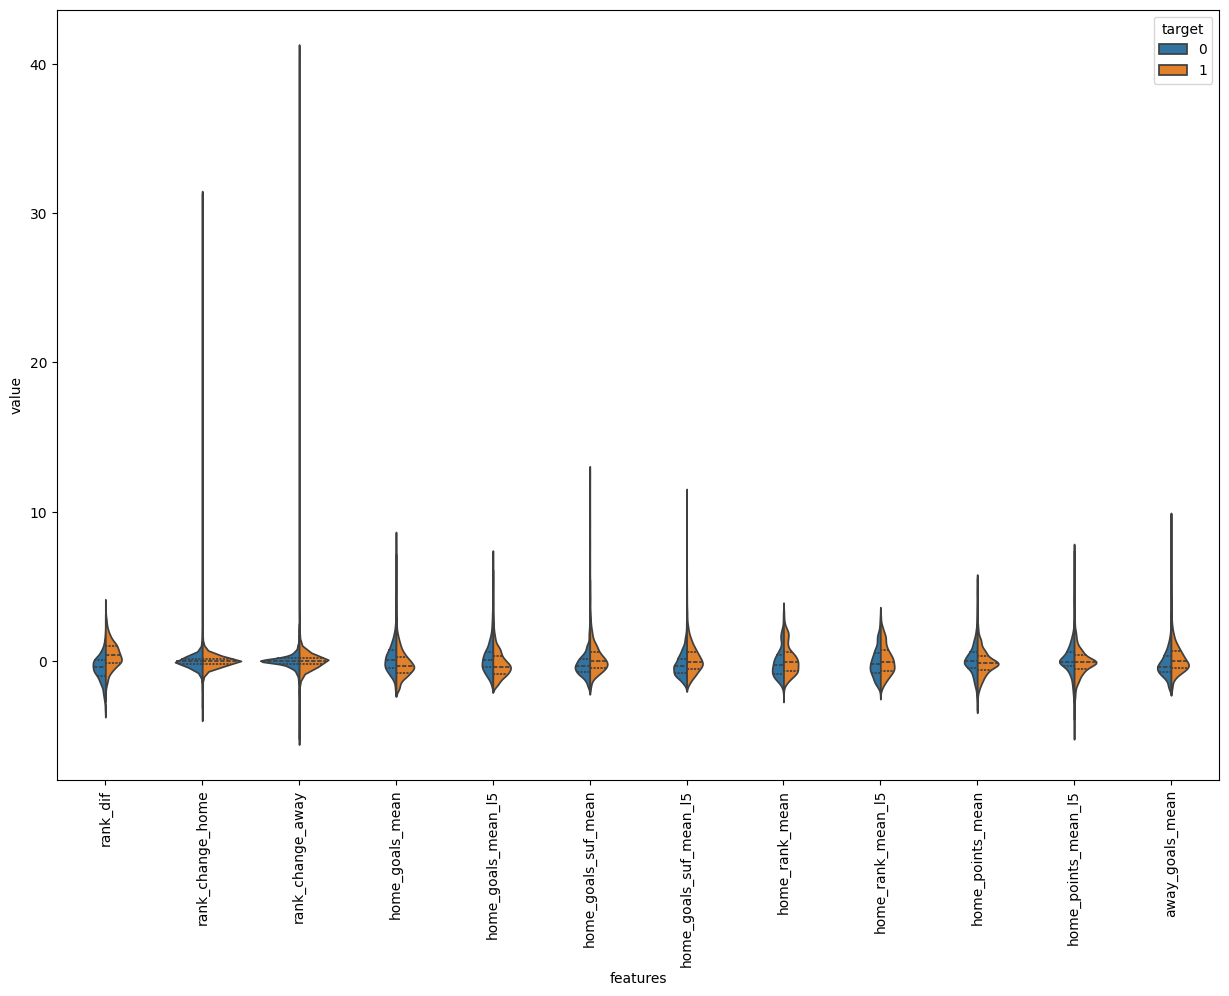

In [48]:
plt.figure(figsize=(15,10))
sns.violinplot(x="features", y="value", hue="target", data=violin1,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

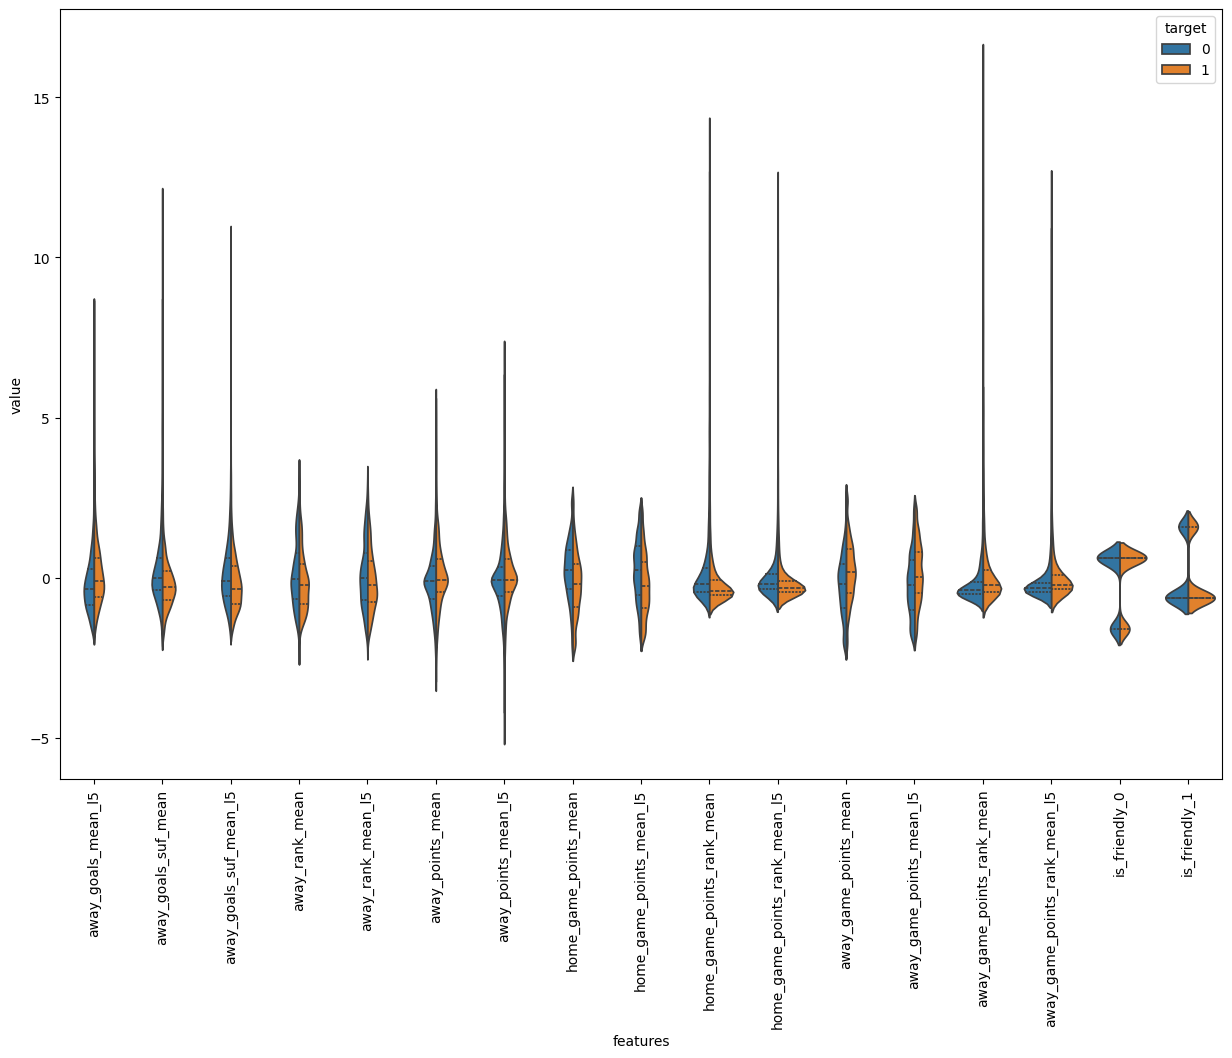

In [49]:
plt.figure(figsize=(15,10))
sns.violinplot(x="features", y="value", hue="target", data=violin2,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

In [50]:
dif = df.copy()
dif.loc[:, "goals_dif"] = dif["home_goals_mean"] - dif["away_goals_mean"]
dif.loc[:, "goals_dif_l5"] = dif["home_goals_mean_l5"] - dif["away_goals_mean_l5"]
dif.loc[:, "goals_suf_dif"] = dif["home_goals_suf_mean"] - dif["away_goals_suf_mean"]
dif.loc[:, "goals_suf_dif_l5"] = dif["home_goals_suf_mean_l5"] - dif["away_goals_suf_mean_l5"]
dif.loc[:, "goals_made_suf_dif"] = dif["home_goals_mean"] - dif["away_goals_suf_mean"]
dif.loc[:, "goals_made_suf_dif_l5"] = dif["home_goals_mean_l5"] - dif["away_goals_suf_mean_l5"]
dif.loc[:, "goals_suf_made_dif"] = dif["home_goals_suf_mean"] - dif["away_goals_mean"]
dif.loc[:, "goals_suf_made_dif_l5"] = dif["home_goals_suf_mean_l5"] - dif["away_goals_mean_l5"]

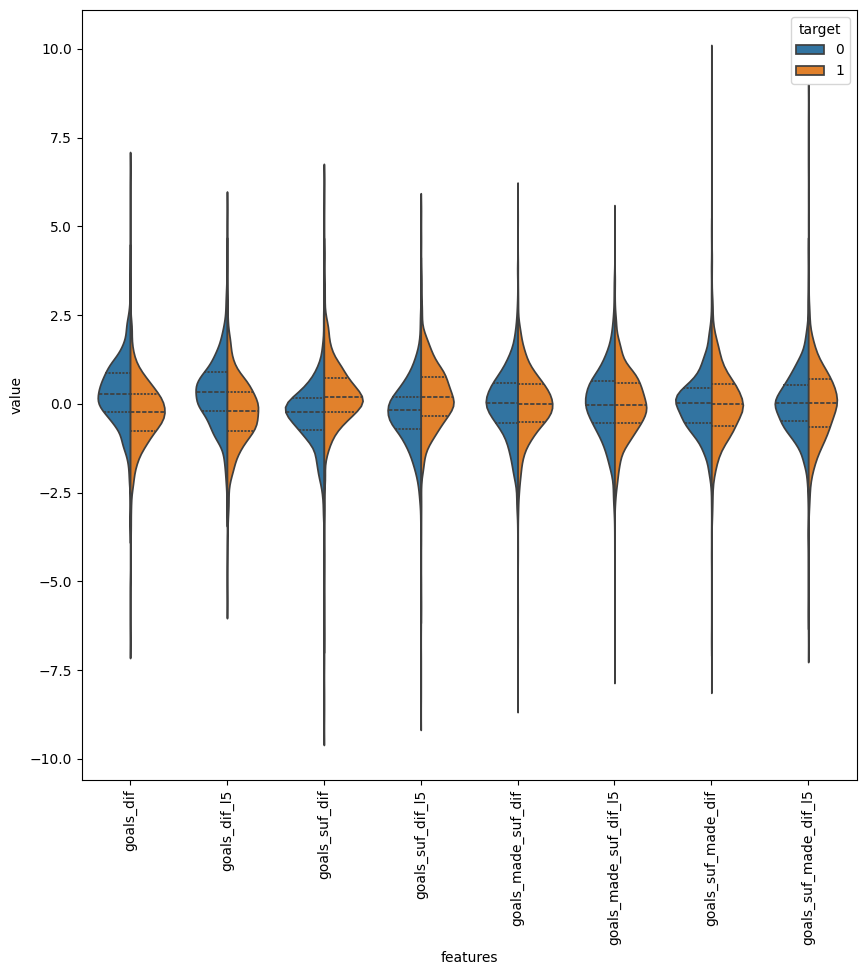

In [51]:
data_difs = dif.iloc[:, -8:]
scaled = (data_difs - data_difs.mean()) / data_difs.std()
scaled["target"] = data2["target"]
violin = pd.melt(scaled,id_vars="target", var_name="features", value_name="value")

plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="target", data=violin,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

In [52]:
dif.loc[:, "dif_points"] = dif["home_game_points_mean"] - dif["away_game_points_mean"]
dif.loc[:, "dif_points_l5"] = dif["home_game_points_mean_l5"] - dif["away_game_points_mean_l5"]
dif.loc[:, "dif_points_rank"] = dif["home_game_points_rank_mean"] - dif["away_game_points_rank_mean"]
dif.loc[:, "dif_points_rank_l5"] = dif["home_game_points_rank_mean_l5"] - dif["away_game_points_rank_mean_l5"]

In [53]:
dif.loc[:, "dif_rank_agst"] = dif["home_rank_mean"] - dif["away_rank_mean"]
dif.loc[:, "dif_rank_agst_l5"] = dif["home_rank_mean_l5"] - dif["away_rank_mean_l5"]

In [54]:
dif.loc[:, "goals_per_ranking_dif"] = (dif["home_goals_mean"] / dif["home_rank_mean"]) - (dif["away_goals_mean"] / dif["away_rank_mean"])
dif.loc[:, "goals_per_ranking_suf_dif"] = (dif["home_goals_suf_mean"] / dif["home_rank_mean"]) - (dif["away_goals_suf_mean"] / dif["away_rank_mean"])
dif.loc[:, "goals_per_ranking_dif_l5"] = (dif["home_goals_mean_l5"] / dif["home_rank_mean"]) - (dif["away_goals_mean_l5"] / dif["away_rank_mean"])
dif.loc[:, "goals_per_ranking_suf_dif_l5"] = (dif["home_goals_suf_mean_l5"] / dif["home_rank_mean"]) - (dif["away_goals_suf_mean_l5"] / dif["away_rank_mean"])

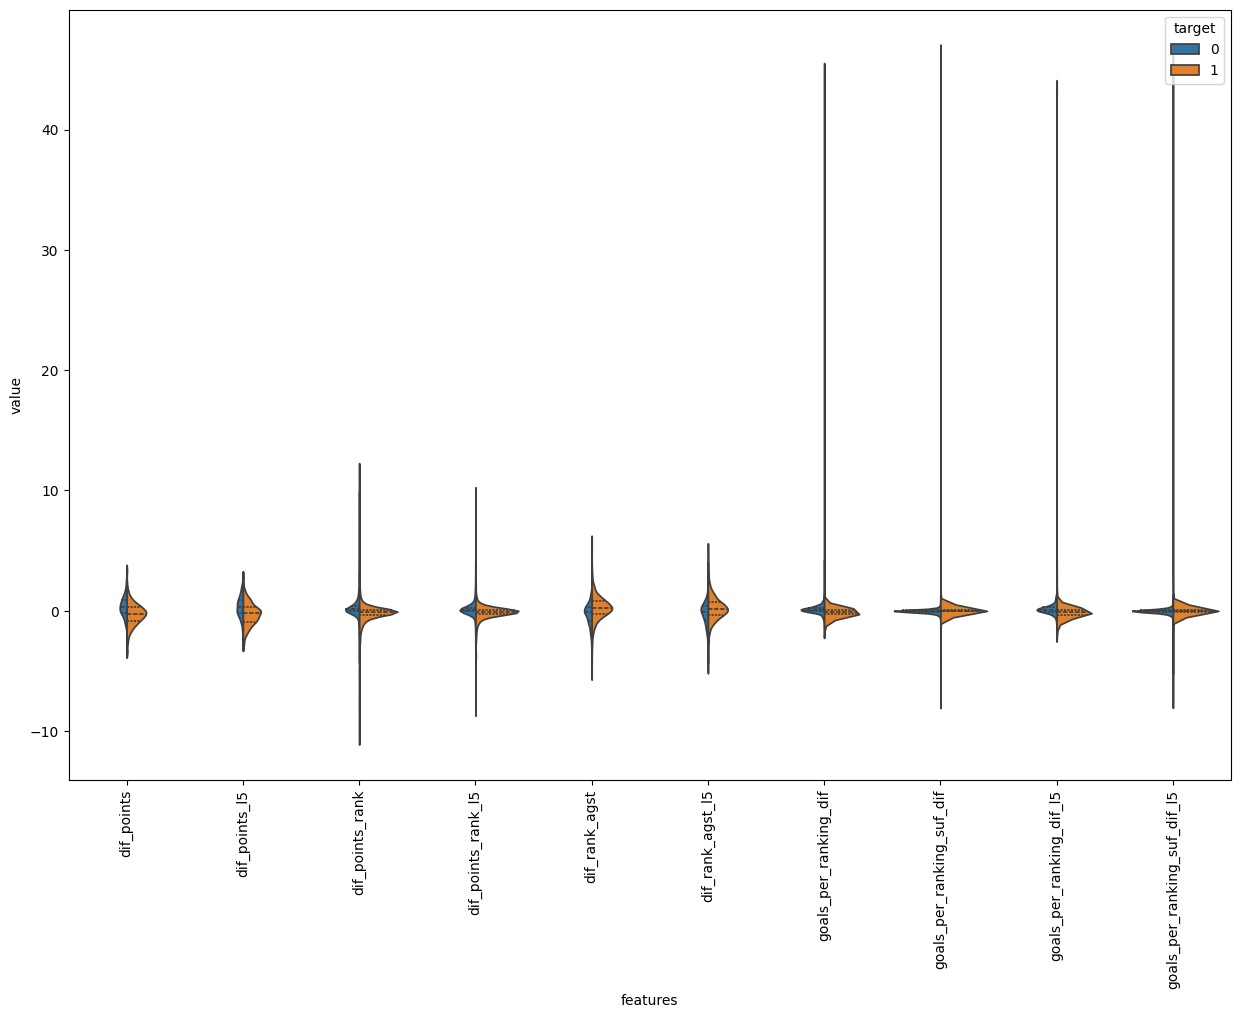

In [55]:
data_difs = dif.iloc[:, -10:]
scaled = (data_difs - data_difs.mean()) / data_difs.std()
scaled["target"] = data2["target"]
violin = pd.melt(scaled,id_vars="target", var_name="features", value_name="value")

plt.figure(figsize=(15,10))
sns.violinplot(x="features", y="value", hue="target", data=violin,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

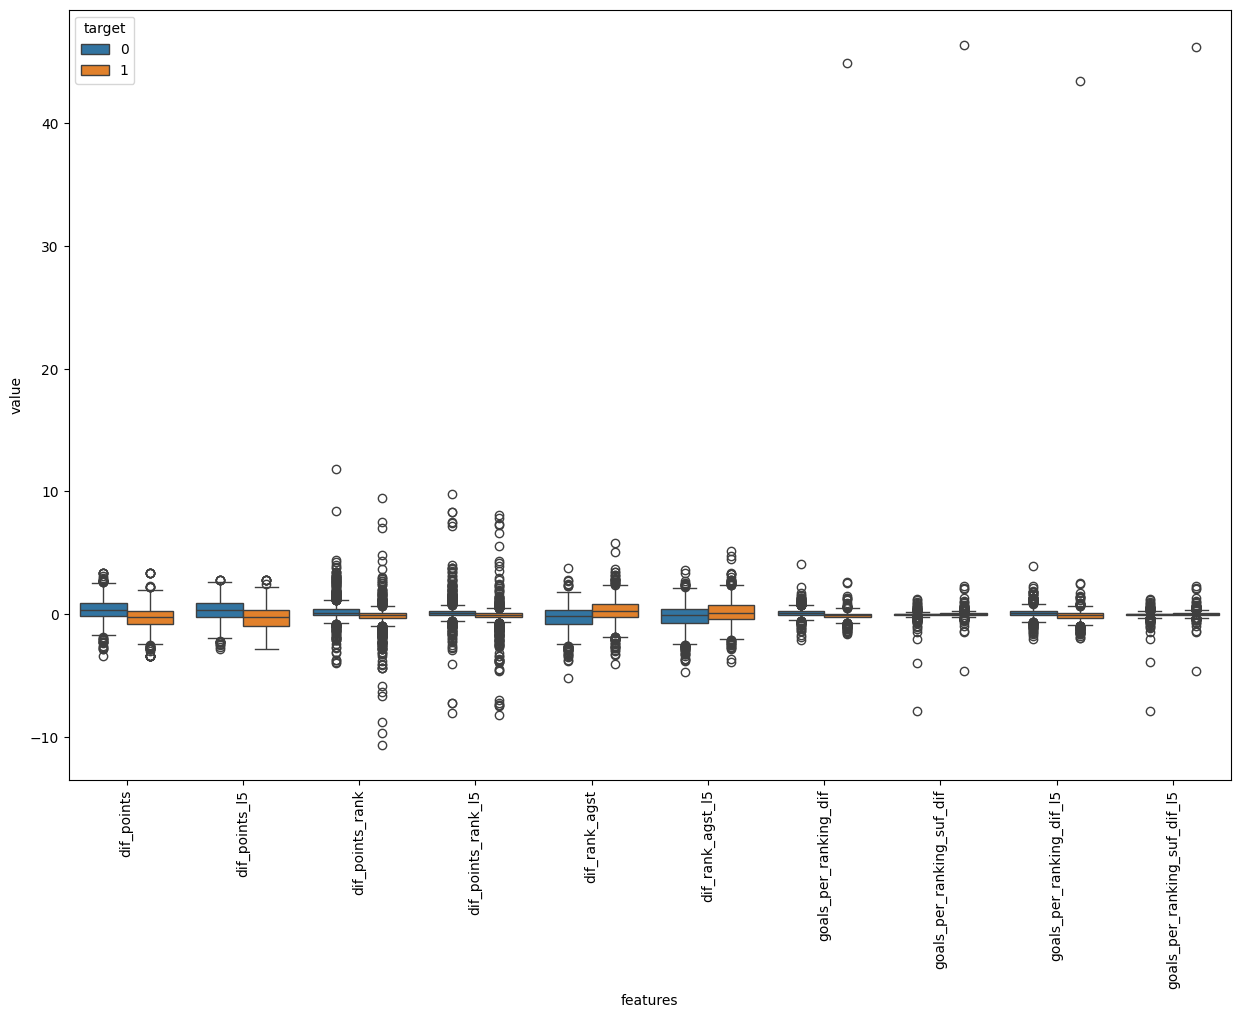

In [56]:
plt.figure(figsize=(15,10))
sns.boxplot(x="features", y="value", hue="target", data=violin)
plt.xticks(rotation=90)
plt.show()

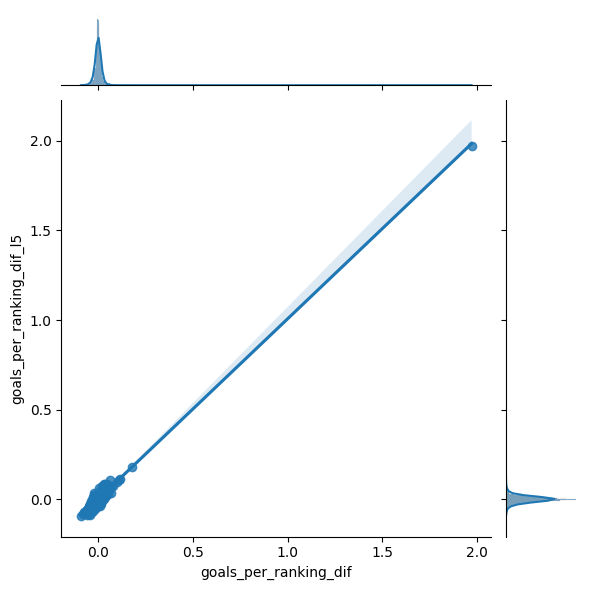

In [57]:
sns.jointplot(data = data_difs, x = 'goals_per_ranking_dif', y = 'goals_per_ranking_dif_l5', kind="reg")
plt.show()

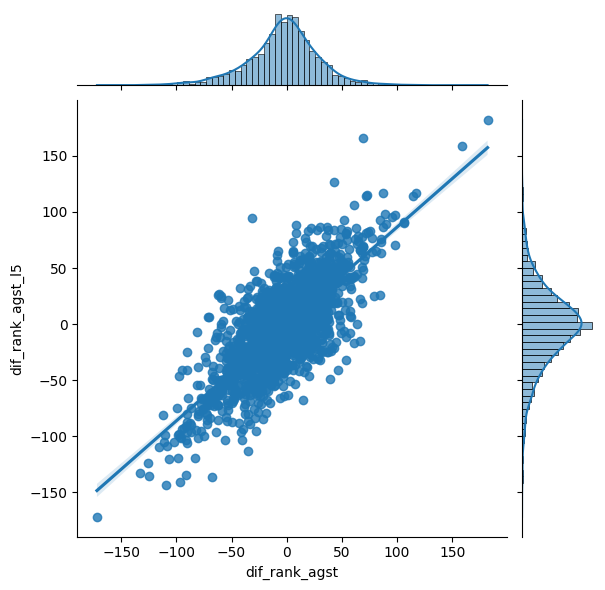

In [58]:
sns.jointplot(data = data_difs, x = 'dif_rank_agst', y = 'dif_rank_agst_l5', kind="reg")
plt.show()

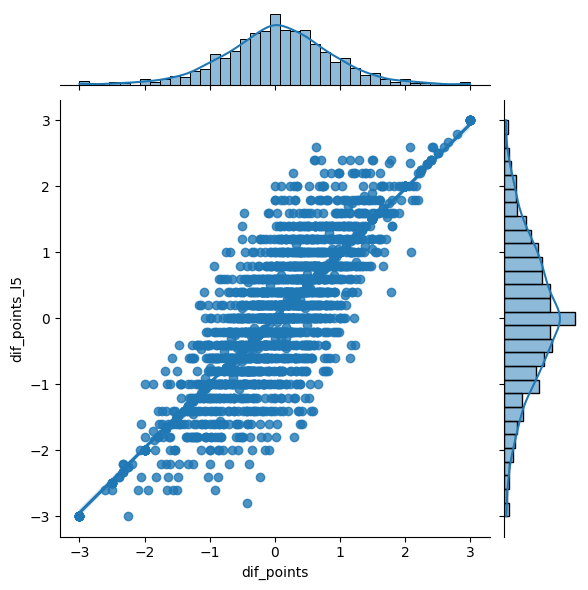

In [59]:
sns.jointplot(data = data_difs, x = 'dif_points', y = 'dif_points_l5', kind="reg")
plt.show()

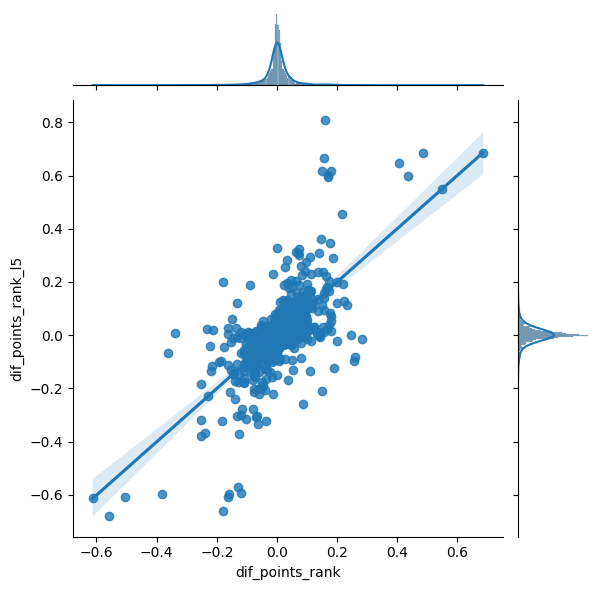

In [60]:
sns.jointplot(data = data_difs, x = 'dif_points_rank', y = 'dif_points_rank_l5', kind="reg")
plt.show()

In [61]:
def create_db(df):
    columns = ["home_team", "away_team", "target", "rank_dif", "home_goals_mean", "home_rank_mean", "away_goals_mean", "away_rank_mean", "home_rank_mean_l5", "away_rank_mean_l5", "home_goals_suf_mean", "away_goals_suf_mean", "home_goals_mean_l5", "away_goals_mean_l5", "home_goals_suf_mean_l5", "away_goals_suf_mean_l5", "home_game_points_rank_mean", "home_game_points_rank_mean_l5", "away_game_points_rank_mean", "away_game_points_rank_mean_l5","is_friendly_0", "is_friendly_1"]
    
    base = df.loc[:, columns]
    base.loc[:, "goals_dif"] = base["home_goals_mean"] - base["away_goals_mean"]
    base.loc[:, "goals_dif_l5"] = base["home_goals_mean_l5"] - base["away_goals_mean_l5"]
    base.loc[:, "goals_suf_dif"] = base["home_goals_suf_mean"] - base["away_goals_suf_mean"]
    base.loc[:, "goals_suf_dif_l5"] = base["home_goals_suf_mean_l5"] - base["away_goals_suf_mean_l5"]
    base.loc[:, "goals_per_ranking_dif"] = (base["home_goals_mean"] / base["home_rank_mean"]) - (base["away_goals_mean"] / base["away_rank_mean"])
    base.loc[:, "dif_rank_agst"] = base["home_rank_mean"] - base["away_rank_mean"]
    base.loc[:, "dif_rank_agst_l5"] = base["home_rank_mean_l5"] - base["away_rank_mean_l5"]
    base.loc[:, "dif_points_rank"] = base["home_game_points_rank_mean"] - base["away_game_points_rank_mean"]
    base.loc[:, "dif_points_rank_l5"] = base["home_game_points_rank_mean_l5"] - base["away_game_points_rank_mean_l5"]
    
    model_df = base[["home_team", "away_team", "target", "rank_dif", "goals_dif", "goals_dif_l5", "goals_suf_dif", "goals_suf_dif_l5", "goals_per_ranking_dif", "dif_rank_agst", "dif_rank_agst_l5", "dif_points_rank", "dif_points_rank_l5", "is_friendly_0", "is_friendly_1"]]
    return model_df

In [62]:
model_db = create_db(df)

In [63]:
model_db

,home_team,away_team,target,rank_dif,goals_dif,goals_dif_l5,goals_suf_dif,goals_suf_dif_l5,goals_per_ranking_dif,dif_rank_agst,dif_rank_agst_l5,dif_points_rank,dif_points_rank_l5,is_friendly_0,is_friendly_1
2,Sudan,Niger,0,4.0,-1.000000,-1.0,1.000000,1.0,-0.007982,-4.000000,-4.0,-0.024793,-0.024793,False,True
70,Qatar,Portugal,1,34.0,-2.000000,-2.0,3.000000,3.0,-0.042553,-18.000000,-18.0,-0.063830,-0.063830,False,True
71,Republic of Ireland,Azerbaijan,1,-65.0,0.000000,0.0,0.000000,0.0,0.114583,-88.000000,-88.0,0.000000,0.000000,True,False
72,Serbia,Luxembourg,0,-67.0,2.000000,2.0,-1.000000,-1.0,0.077381,-70.000000,-70.0,0.044643,0.044643,True,False
73,Finland,Kazakhstan,0,-68.0,-2.000000,-2.0,-2.000000,-2.0,-0.080000,-6.000000,-6.0,0.012632,0.012632,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458,Scotland,Northern Ireland,1,-40.0,0.568681,0.0,0.093407,1.8,0.016070,-25.156593,-51.2,0.022744,-0.031528,False,True
2459,Senegal,Benin,0,-81.0,0.631579,0.8,-0.394737,-1.4,0.010104,-21.842105,-21.6,0.040388,0.031098,False,True
2460,Slovenia,Portugal,0,48.0,-1.282759,-2.0,0.503448,0.2,-0.028323,14.245977,-5.8,-0.025946,0.008337,False,True
2461,Spain,Brazil,1,3.0,0.071264,1.2,-0.043678,-0.6,-0.018543,12.340230,39.4,-0.016593,-0.157732,False,True


In [64]:
model_db.to_csv('model_db.csv', index=False)

In [65]:
X = model_db.iloc[:, 3:]
y = model_db[["target"]]

In [66]:
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 147.5 MB/s eta 0:00:00


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/11.1 MB ? eta -:--:--

   ━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/11.1 MB 117.7 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 134.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 182.8 MB/s eta 0:00:00


   ━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/34.5 MB 163.8 MB/s eta 0:00:01

   ━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/34.5 MB 161.6 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━ 16.1/34.5 MB 153.0 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━ 26.3/34.5 MB 139.8 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 154.3 MB/s eta 0:00:00


In [67]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=1)

In [69]:
gb = GradientBoostingClassifier(random_state=5)

params = {"learning_rate": [0.01, 0.1, 0.5],
            "min_samples_split": [5, 10],
            "min_samples_leaf": [3, 5],
            "max_depth":[3,5,10],
            "max_features":["sqrt"],
            "n_estimators":[100, 200]
         } 

gb_cv = GridSearchCV(gb, params, cv = 3, n_jobs = -1, verbose = False)

gb_cv.fit(X_train.values, np.ravel(y_train))

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=5),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 10], 'max_features': ['sqrt'],
                         'min_samples_leaf': [3, 5],
                         'min_samples_split': [5, 10],
                         'n_estimators': [100, 200]},
             verbose=False)

In [70]:
gb = gb_cv.best_estimator_

In [71]:
params_rf = {"max_depth": [20],
                "min_samples_split": [10],
                "max_leaf_nodes": [175],
                "min_samples_leaf": [5],
                "n_estimators": [250],
                 "max_features": ["sqrt"],
                }

rf = RandomForestClassifier(random_state=1)

rf_cv = GridSearchCV(rf, params_rf, cv = 3, n_jobs = -1, verbose = False)

rf_cv.fit(X_train.values, np.ravel(y_train))

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [20], 'max_features': ['sqrt'],
                         'max_leaf_nodes': [175], 'min_samples_leaf': [5],
                         'min_samples_split': [10], 'n_estimators': [250]},
             verbose=False)

In [72]:
rf = rf_cv.best_estimator_

In [73]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [74]:
def analyze(model):
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test.values)[:,1]) #test AUC
    plt.figure(figsize=(15,10))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label="test")

    fpr_train, tpr_train, _ = roc_curve(y_train, model.predict_proba(X_train.values)[:,1]) #train AUC
    plt.plot(fpr_train, tpr_train, label="train")
    auc_test = roc_auc_score(y_test, model.predict_proba(X_test.values)[:,1])
    auc_train = roc_auc_score(y_train, model.predict_proba(X_train.values)[:,1])
    plt.legend()
    plt.title('AUC score is %.2f on test and %.2f on training'%(auc_test, auc_train))
    plt.show()
    
    plt.figure(figsize=(15, 10))
    cm = confusion_matrix(y_test, model.predict(X_test.values))
    sns.heatmap(cm, annot=True, fmt="d")

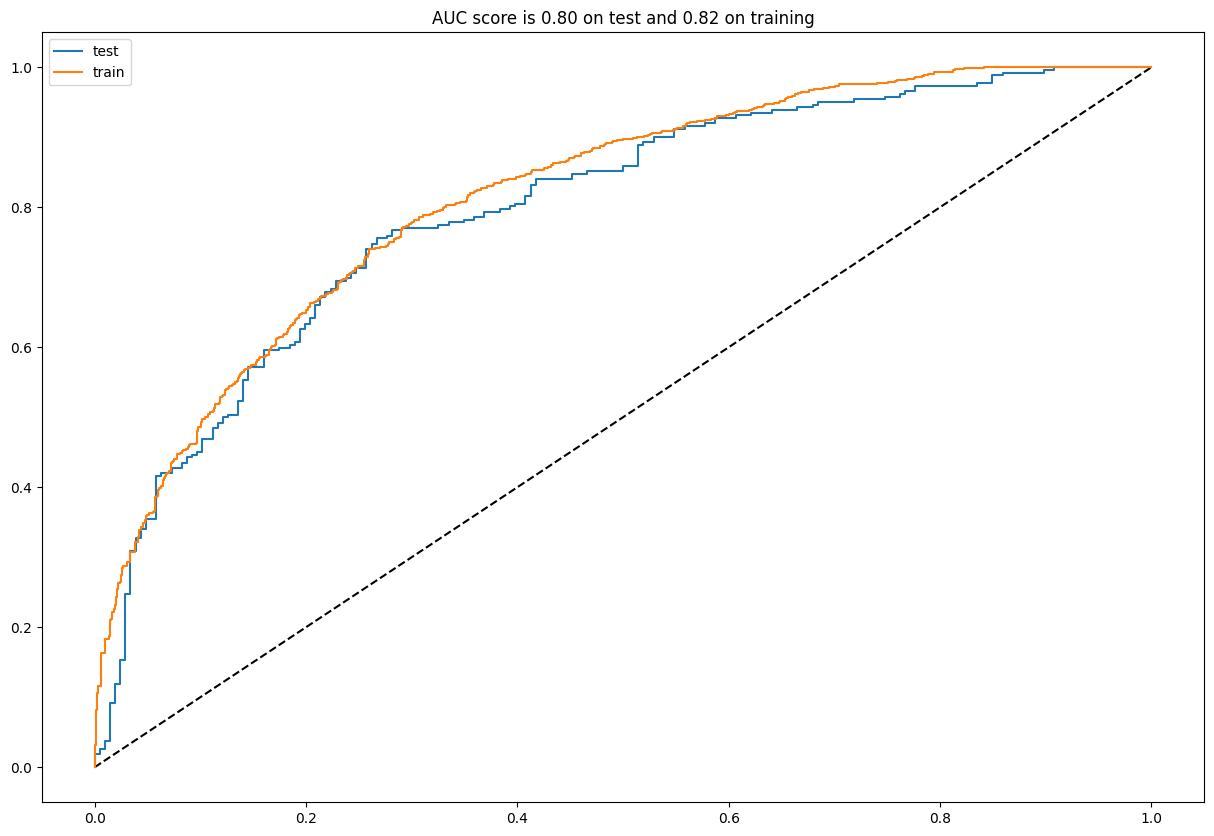

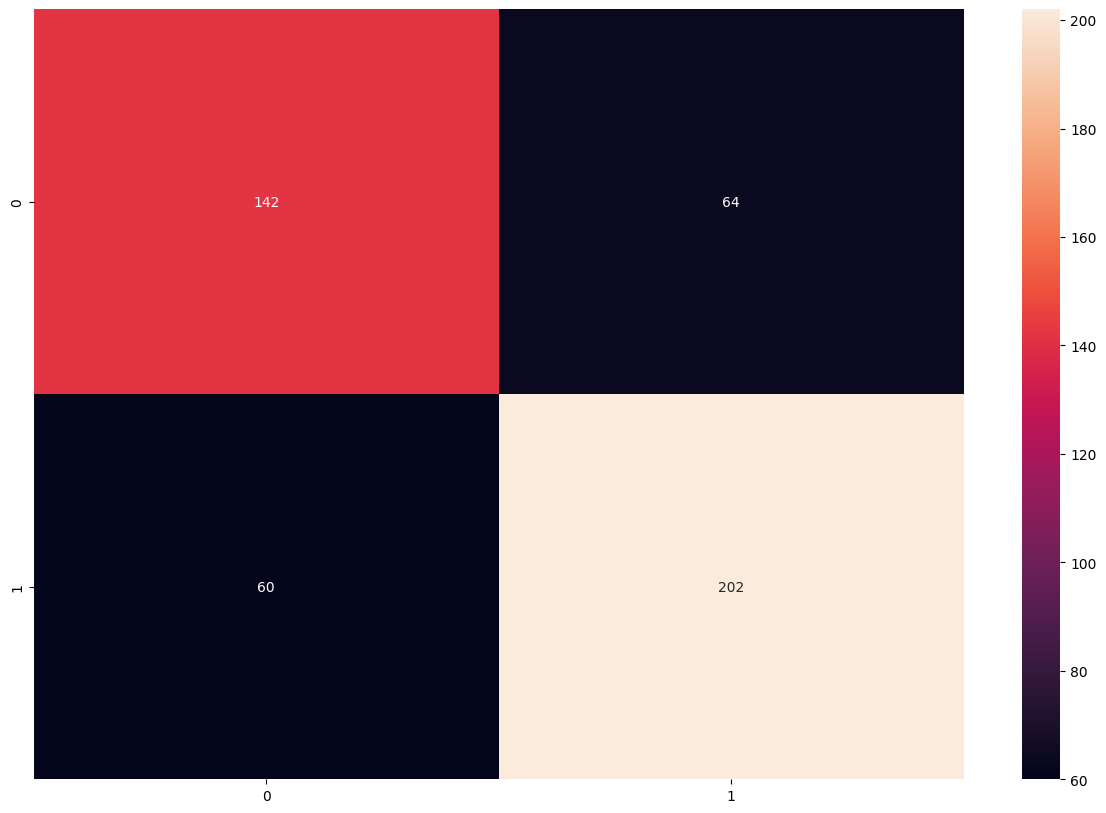

In [75]:
analyze(gb)

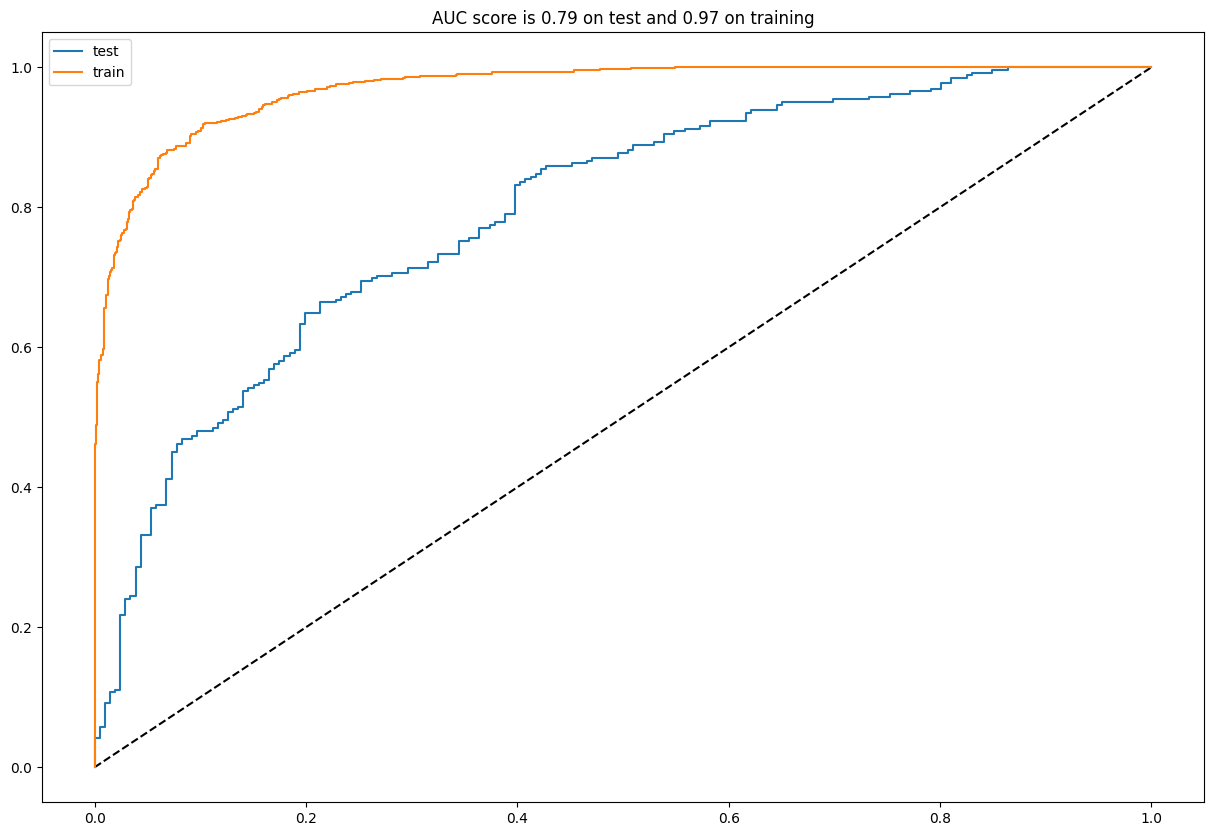

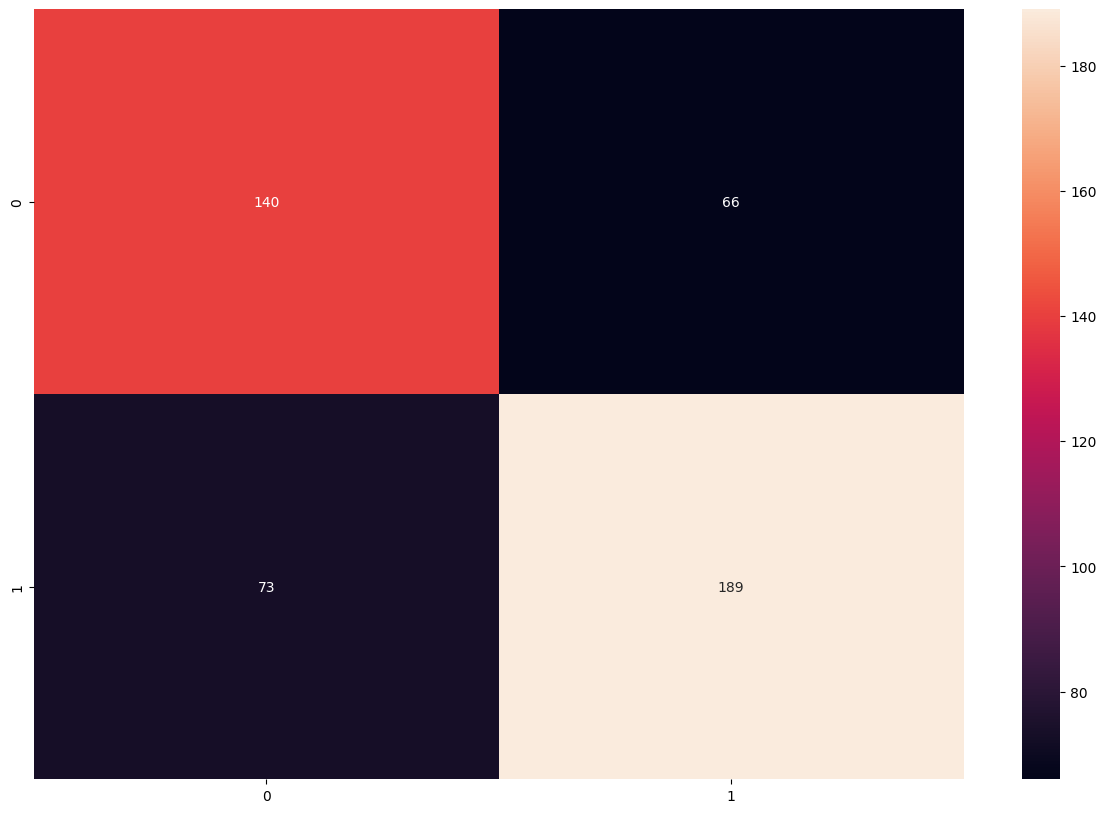

In [76]:
analyze(rf)

In [77]:
from operator import itemgetter

In [78]:
table = {'A': [['Argentina', 0, []],
  ['Peru', 0, []],
  ['Chile', 0, []],
  ['Canada', 0, []]],
 'B': [['Mexico', 0, []],
  ['Ecuador', 0, []],
  ['Venezuela', 0, []],
  ['Jamaica', 0, []]],
 'C': [['United States', 0, []],
  ['Uruguay', 0, []],
  ['Panama', 0, []],
  ['Bolivia', 0, []]],
 'D': [['Brazil', 0, []],
  ['Colombia', 0, []],
  ['Paraguay', 0, []],
  ['Costa Rica', 0, []]]}

matches = [('A', 'Argentina', 'Canada'),
 ('A', 'Peru', 'Chile'),
 ('A', 'Peru', 'Canada'),
 ('A', 'Chile', 'Argentina'),
 ('A', 'Argentina', 'Peru'),
 ('A', 'Canada', 'Chile'),
 
 ('B', 'Ecuador', 'Venezuela'),
 ('B', 'Mexico', 'Jamaica'),
 ('B', 'Ecuador', 'Jamaica'),
 ('B', 'Venezuela', 'Mexico'),
 ('B', 'Mexico', 'Ecuador'),
 ('B', 'Jamaica', 'Venezuela'),
 
 ('C', 'United States', 'Bolivia'),
 ('C', 'Uruguay', 'Panama'),
 ('C', 'Panama', 'United States'),
 ('C', 'Uruguay', 'Bolivia'),
 ('C', 'United States', 'Uruguay'),
 ('C', 'Bolivia', 'Panama'),
 
 ('D', 'Colombia', 'Paraguay'),
 ('D', 'Brazil', 'Costa Rica'),
 ('D', 'Colombia', 'Costa Rica'),
 ('D', 'Paraguay', 'Brazil'),
 ('D', 'Brazil', 'Colombia'),
 ('D', 'Costa Rica', 'Paraguay')]

In [79]:
def find_stats(team_1):
    past_games = team_stats_raw[(team_stats_raw["team"] == team_1)].sort_values("date")
    last5 = team_stats_raw[(team_stats_raw["team"] == team_1)].sort_values("date").tail(5)

    team_1_rank = past_games["rank"].values[-1]
    team_1_goals = past_games.score.mean()
    team_1_goals_l5 = last5.score.mean()
    team_1_goals_suf = past_games.suf_score.mean()
    team_1_goals_suf_l5 = last5.suf_score.mean()
    team_1_rank_suf = past_games.rank_suf.mean()
    team_1_rank_suf_l5 = last5.rank_suf.mean()
    team_1_gp_rank = past_games.points_by_rank.mean()
    team_1_gp_rank_l5 = last5.points_by_rank.mean()

    return [team_1_rank, team_1_goals, team_1_goals_l5, team_1_goals_suf, team_1_goals_suf_l5, team_1_rank_suf, team_1_rank_suf_l5, team_1_gp_rank, team_1_gp_rank_l5]

In [80]:
def find_features(team_1, team_2):
    rank_dif = team_1[0] - team_2[0]
    goals_dif = team_1[1] - team_2[1]
    goals_dif_l5 = team_1[2] - team_2[2]
    goals_suf_dif = team_1[3] - team_2[3]
    goals_suf_dif_l5 = team_1[4] - team_2[4]
    goals_per_ranking_dif = (team_1[1]/team_1[5]) - (team_2[1]/team_2[5])
    dif_rank_agst = team_1[5] - team_2[5]
    dif_rank_agst_l5 = team_1[6] - team_2[6]
    dif_gp_rank = team_1[7] - team_2[7]
    dif_gp_rank_l5 = team_1[8] - team_2[8]
    
    return [rank_dif, goals_dif, goals_dif_l5, goals_suf_dif, goals_suf_dif_l5, goals_per_ranking_dif, dif_rank_agst, dif_rank_agst_l5, dif_gp_rank, dif_gp_rank_l5, 1, 0]

In [81]:
advanced_group = []
last_group = ""

for k in table.keys():
    for t in table[k]:
        t[1] = 0
        t[2] = []
        
for teams in matches:
    draw = False
    team_1 = find_stats(teams[1])
    team_2 = find_stats(teams[2])

    features_g1 = find_features(team_1, team_2)
    features_g2 = find_features(team_2, team_1)

    probs_g1 = gb.predict_proba([features_g1])
    probs_g2 = gb.predict_proba([features_g2])
    
    team_1_prob_g1 = probs_g1[0][0]
    team_1_prob_g2 = probs_g2[0][1]
    team_2_prob_g1 = probs_g1[0][1]
    team_2_prob_g2 = probs_g2[0][0]

    team_1_prob = (probs_g1[0][0] + probs_g2[0][1])/2
    team_2_prob = (probs_g2[0][0] + probs_g1[0][1])/2
    
    if ((team_1_prob_g1 > team_2_prob_g1) & (team_2_prob_g2 > team_1_prob_g2)) | ((team_1_prob_g1 < team_2_prob_g1) & (team_2_prob_g2 < team_1_prob_g2)):
        draw=True
        for i in table[teams[0]]:
            if i[0] == teams[1] or i[0] == teams[2]:
                i[1] += 1
                
    elif team_1_prob > team_2_prob:
        winner = teams[1]
        winner_proba = team_1_prob
        for i in table[teams[0]]:
            if i[0] == teams[1]:
                i[1] += 3
                
    elif team_2_prob > team_1_prob:  
        winner = teams[2]
        winner_proba = team_2_prob
        for i in table[teams[0]]:
            if i[0] == teams[2]:
                i[1] += 3
    
    for i in table[teams[0]]: #adding criterio de desempate (probs por jogo)
            if i[0] == teams[1]:
                i[2].append(team_1_prob)
            if i[0] == teams[2]:
                i[2].append(team_2_prob)

    if last_group != teams[0]:
        if last_group != "":
            print("\n")
            print("Do grupo %s avançam: "%(last_group))
            
            for i in table[last_group]: #adding crieterio de desempate
                i[2] = np.mean(i[2])
            
            final_points = table[last_group]
            final_table = sorted(final_points, key=itemgetter(1, 2), reverse = True)
            advanced_group.append([final_table[0][0], final_table[1][0]])
            for i in final_table:
                print("%s -------- %d"%(i[0], i[1]))
        print("\n")
        print("-"*10+" Simulando o Grupo %s "%(teams[0])+"-"*10)
        
        
    if draw == False:
        print("Grupo %s - %s vs. %s: Vencedor %s com %.2f de probabilidade"%(teams[0], teams[1], teams[2], winner, winner_proba))
    else:
        print("Grupo %s - %s vs. %s: Empate"%(teams[0], teams[1], teams[2]))
    last_group =  teams[0]

print("\n")
print("Do grupo %s avançam: "%(last_group))

for i in table[last_group]: #adding crieterio de desempate
    i[2] = np.mean(i[2])
            
final_points = table[last_group]
final_table = sorted(final_points, key=itemgetter(1, 2), reverse = True)
advanced_group.append([final_table[0][0], final_table[1][0]])
for i in final_table:
    print("%s -------- %d"%(i[0], i[1]))



---------- Simulando o Grupo A ----------
Grupo A - Argentina vs. Canada: Vencedor Argentina com 0.76 de probabilidade
Grupo A - Peru vs. Chile: Empate
Grupo A - Peru vs. Canada: Empate
Grupo A - Chile vs. Argentina: Vencedor Argentina com 0.78 de probabilidade
Grupo A - Argentina vs. Peru: Vencedor Argentina com 0.73 de probabilidade
Grupo A - Canada vs. Chile: Vencedor Canada com 0.57 de probabilidade


Do grupo A avançam: 
Argentina -------- 9
Canada -------- 4
Peru -------- 2
Chile -------- 1


---------- Simulando o Grupo B ----------
Grupo B - Ecuador vs. Venezuela: Vencedor Ecuador com 0.66 de probabilidade
Grupo B - Mexico vs. Jamaica: Vencedor Mexico com 0.68 de probabilidade
Grupo B - Ecuador vs. Jamaica: Vencedor Ecuador com 0.70 de probabilidade
Grupo B - Venezuela vs. Mexico: Empate
Grupo B - Mexico vs. Ecuador: Empate
Grupo B - Jamaica vs. Venezuela: Empate


Do grupo B avançam: 
Ecuador -------- 7
Mexico -------- 5
Venezuela -------- 2
Jamaica -------- 1


---------- S

In [82]:
advanced = advanced_group

In [83]:
playoffs = {"s Oitavas de Final": [], "s Quartas de Final": [], " Semi-Final": [], " Final": []}

for p in playoffs.keys():
    playoffs[p] = []

actual_round = ""
next_rounds = []

for p in playoffs.keys():
    if p == "s Oitavas de Final":
        control = []
        for a in range(0, len(advanced*2), 1):
            if a < len(advanced):
                if a % 2 == 0:
                    control.append((advanced*2)[a][0])
                else:
                    control.append((advanced*2)[a][1])
            else:
                if a % 2 == 0:
                    control.append((advanced*2)[a][1])
                else:
                    control.append((advanced*2)[a][0])

        playoffs[p] = [[control[c], control[c+1]] for c in range(0, len(control)-1, 1) if c%2 == 0]
        
        for i in range(0, len(playoffs[p]), 1):
            game = playoffs[p][i]
            
            home = game[0]
            away = game[1]
            team_1 = find_stats(home)
            team_2 = find_stats(away)

            features_g1 = find_features(team_1, team_2)
            features_g2 = find_features(team_2, team_1)
            
            probs_g1 = gb.predict_proba([features_g1])
            probs_g2 = gb.predict_proba([features_g2])
            
            team_1_prob = (probs_g1[0][0] + probs_g2[0][1])/2
            team_2_prob = (probs_g2[0][0] + probs_g1[0][1])/2
            
            if actual_round != p:
                print("-"*10)
                print("Simulação da%s"%(p))
                print("-"*10)
                print("\n")
            
            if team_1_prob < team_2_prob:
                print("%s vs. %s: %s avança com a probabilidade de %.2f"%(home, away, away, team_2_prob))
                next_rounds.append(away)
            else:
                print("%s vs. %s: %s avança com a probabilidade de %.2f"%(home, away, home, team_1_prob))
                next_rounds.append(home)
            
            game.append([team_1_prob, team_2_prob])
            playoffs[p][i] = game
            actual_round = p
        
    else:
        playoffs[p] = [[next_rounds[c], next_rounds[c+1]] for c in range(0, len(next_rounds)-1, 1) if c%2 == 0]
        next_rounds = []
        for i in range(0, len(playoffs[p])):
            game = playoffs[p][i]
            home = game[0]
            away = game[1]
            team_1 = find_stats(home)
            team_2 = find_stats(away)
            
            features_g1 = find_features(team_1, team_2)
            features_g2 = find_features(team_2, team_1)
            
            probs_g1 = gb.predict_proba([features_g1])
            probs_g2 = gb.predict_proba([features_g2])
            
            team_1_prob = (probs_g1[0][0] + probs_g2[0][1])/2
            team_2_prob = (probs_g2[0][0] + probs_g1[0][1])/2
            
            if actual_round != p:
                print("-"*10)
                print("Simulação da%s"%(p))
                print("-"*10)
                print("\n")
            
            if team_1_prob < team_2_prob:
                print("%s vs. %s: %s avança com a probabilidade de %.2f"%(home, away, away, team_2_prob))
                next_rounds.append(away)
            else:
                print("%s vs. %s: %s avança com a probabilidade de %.2f"%(home, away, home, team_1_prob))
                next_rounds.append(home)
            game.append([team_1_prob, team_2_prob])
            playoffs[p][i] = game
            actual_round = p
            

----------
Simulação das Oitavas de Final
----------


Argentina vs. Mexico: Argentina avança com a probabilidade de 0.65
Uruguay vs. Colombia: Uruguay avança com a probabilidade de 0.50
Canada vs. Ecuador: Ecuador avança com a probabilidade de 0.60
United States vs. Brazil: Brazil avança com a probabilidade de 0.59
----------
Simulação das Quartas de Final
----------


Argentina vs. Uruguay: Argentina avança com a probabilidade de 0.58
Ecuador vs. Brazil: Brazil avança com a probabilidade de 0.65
----------
Simulação da Semi-Final
----------


Argentina vs. Brazil: Argentina avança com a probabilidade de 0.52


In [84]:
advanced_group = []
last_group = ""

for k in table.keys():
    for t in table[k]:
        t[1] = 0
        t[2] = []
        
for teams in matches:
    draw = False
    team_1 = find_stats(teams[1])
    team_2 = find_stats(teams[2])

    features_g1 = find_features(team_1, team_2)
    features_g2 = find_features(team_2, team_1)

    probs_g1 = rf.predict_proba([features_g1])
    probs_g2 = rf.predict_proba([features_g2])
    
    team_1_prob_g1 = probs_g1[0][0]
    team_1_prob_g2 = probs_g2[0][1]
    team_2_prob_g1 = probs_g1[0][1]
    team_2_prob_g2 = probs_g2[0][0]

    team_1_prob = (probs_g1[0][0] + probs_g2[0][1])/2
    team_2_prob = (probs_g2[0][0] + probs_g1[0][1])/2
    
    if ((team_1_prob_g1 > team_2_prob_g1) & (team_2_prob_g2 > team_1_prob_g2)) | ((team_1_prob_g1 < team_2_prob_g1) & (team_2_prob_g2 < team_1_prob_g2)):
        draw=True
        for i in table[teams[0]]:
            if i[0] == teams[1] or i[0] == teams[2]:
                i[1] += 1
                
    elif team_1_prob > team_2_prob:
        winner = teams[1]
        winner_proba = team_1_prob
        for i in table[teams[0]]:
            if i[0] == teams[1]:
                i[1] += 3
                
    elif team_2_prob > team_1_prob:  
        winner = teams[2]
        winner_proba = team_2_prob
        for i in table[teams[0]]:
            if i[0] == teams[2]:
                i[1] += 3
    
    for i in table[teams[0]]: #adding criterio de desempate (probs por jogo)
            if i[0] == teams[1]:
                i[2].append(team_1_prob)
            if i[0] == teams[2]:
                i[2].append(team_2_prob)

    if last_group != teams[0]:
        if last_group != "":
            print("\n")
            print("Do grupo %s avançam: "%(last_group))
            
            for i in table[last_group]: #adding crieterio de desempate
                i[2] = np.mean(i[2])
            
            final_points = table[last_group]
            final_table = sorted(final_points, key=itemgetter(1, 2), reverse = True)
            advanced_group.append([final_table[0][0], final_table[1][0]])
            for i in final_table:
                print("%s -------- %d"%(i[0], i[1]))
        print("\n")
        print("-"*10+" Simulando o Grupo %s "%(teams[0])+"-"*10)
        
        
    if draw == False:
        print("Grupo %s - %s vs. %s: Vencedor %s com %.2f de probabilidade"%(teams[0], teams[1], teams[2], winner, winner_proba))
    else:
        print("Grupo %s - %s vs. %s: Empate"%(teams[0], teams[1], teams[2]))
    last_group =  teams[0]

print("\n")
print("Do grupo %s avançam: "%(last_group))

for i in table[last_group]: #adding crieterio de desempate
    i[2] = np.mean(i[2])
            
final_points = table[last_group]
final_table = sorted(final_points, key=itemgetter(1, 2), reverse = True)
advanced_group.append([final_table[0][0], final_table[1][0]])
for i in final_table:
    print("%s -------- %d"%(i[0], i[1]))



---------- Simulando o Grupo A ----------
Grupo A - Argentina vs. Canada: Vencedor Argentina com 0.81 de probabilidade
Grupo A - Peru vs. Chile: Vencedor Peru com 0.57 de probabilidade
Grupo A - Peru vs. Canada: Empate


Grupo A - Chile vs. Argentina: Vencedor Argentina com 0.82 de probabilidade
Grupo A - Argentina vs. Peru: Vencedor Argentina com 0.75 de probabilidade
Grupo A - Canada vs. Chile: Empate


Do grupo A avançam: 
Argentina -------- 9
Peru -------- 4
Canada -------- 2
Chile -------- 1


---------- Simulando o Grupo B ----------
Grupo B - Ecuador vs. Venezuela: Vencedor Ecuador com 0.65 de probabilidade
Grupo B - Mexico vs. Jamaica: Vencedor Mexico com 0.72 de probabilidade
Grupo B - Ecuador vs. Jamaica: Vencedor Ecuador com 0.73 de probabilidade


Grupo B - Venezuela vs. Mexico: Vencedor Mexico com 0.64 de probabilidade


Grupo B - Mexico vs. Ecuador: Empate
Grupo B - Jamaica vs. Venezuela: Vencedor Venezuela com 0.57 de probabilidade


Do grupo B avançam: 
Ecuador -------- 7
Mexico -------- 7
Venezuela -------- 3
Jamaica -------- 0


---------- Simulando o Grupo C ----------
Grupo C - United States vs. Bolivia: Vencedor United States com 0.82 de probabilidade
Grupo C - Uruguay vs. Panama: Vencedor Uruguay com 0.64 de probabilidade


Grupo C - Panama vs. United States: Vencedor United States com 0.63 de probabilidade


Grupo C - Uruguay vs. Bolivia: Vencedor Uruguay com 0.73 de probabilidade
Grupo C - United States vs. Uruguay: Empate
Grupo C - Bolivia vs. Panama: Vencedor Panama com 0.71 de probabilidade


Do grupo C avançam: 
United States -------- 7
Uruguay -------- 7
Panama -------- 3
Bolivia -------- 0


---------- Simulando o Grupo D ----------
Grupo D - Colombia vs. Paraguay: Vencedor Colombia com 0.65 de probabilidade
Grupo D - Brazil vs. Costa Rica: Vencedor Brazil com 0.79 de probabilidade
Grupo D - Colombia vs. Costa Rica: Vencedor Colombia com 0.75 de probabilidade


Grupo D - Paraguay vs. Brazil: Vencedor Brazil com 0.75 de probabilidade
Grupo D - Brazil vs. Colombia: Empate
Grupo D - Costa Rica vs. Paraguay: Empate


Do grupo D avançam: 
Brazil -------- 7
Colombia -------- 7
Paraguay -------- 1
Costa Rica -------- 1


In [85]:
advanced = advanced_group

In [86]:
playoffs = {"s Oitavas de Final": [], "s Quartas de Final": [], " Semi-Final": [], " Final": []}

for p in playoffs.keys():
    playoffs[p] = []

actual_round = ""
next_rounds = []

for p in playoffs.keys():
    if p == "s Oitavas de Final":
        control = []
        for a in range(0, len(advanced*2), 1):
            if a < len(advanced):
                if a % 2 == 0:
                    control.append((advanced*2)[a][0])
                else:
                    control.append((advanced*2)[a][1])
            else:
                if a % 2 == 0:
                    control.append((advanced*2)[a][1])
                else:
                    control.append((advanced*2)[a][0])

        playoffs[p] = [[control[c], control[c+1]] for c in range(0, len(control)-1, 1) if c%2 == 0]
        
        for i in range(0, len(playoffs[p]), 1):
            game = playoffs[p][i]
            
            home = game[0]
            away = game[1]
            team_1 = find_stats(home)
            team_2 = find_stats(away)

            features_g1 = find_features(team_1, team_2)
            features_g2 = find_features(team_2, team_1)
            
            probs_g1 = rf.predict_proba([features_g1])
            probs_g2 = rf.predict_proba([features_g2])
            
            team_1_prob = (probs_g1[0][0] + probs_g2[0][1])/2
            team_2_prob = (probs_g2[0][0] + probs_g1[0][1])/2
            
            if actual_round != p:
                print("-"*10)
                print("Simulação da%s"%(p))
                print("-"*10)
                print("\n")
            
            if team_1_prob < team_2_prob:
                print("%s vs. %s: %s avança com a probabilidade de %.2f"%(home, away, away, team_2_prob))
                next_rounds.append(away)
            else:
                print("%s vs. %s: %s avança com a probabilidade de %.2f"%(home, away, home, team_1_prob))
                next_rounds.append(home)
            
            game.append([team_1_prob, team_2_prob])
            playoffs[p][i] = game
            actual_round = p
        
    else:
        playoffs[p] = [[next_rounds[c], next_rounds[c+1]] for c in range(0, len(next_rounds)-1, 1) if c%2 == 0]
        next_rounds = []
        for i in range(0, len(playoffs[p])):
            game = playoffs[p][i]
            home = game[0]
            away = game[1]
            team_1 = find_stats(home)
            team_2 = find_stats(away)
            
            features_g1 = find_features(team_1, team_2)
            features_g2 = find_features(team_2, team_1)
            
            probs_g1 = rf.predict_proba([features_g1])
            probs_g2 = rf.predict_proba([features_g2])
            
            team_1_prob = (probs_g1[0][0] + probs_g2[0][1])/2
            team_2_prob = (probs_g2[0][0] + probs_g1[0][1])/2
            
            if actual_round != p:
                print("-"*10)
                print("Simulação da%s"%(p))
                print("-"*10)
                print("\n")
            
            if team_1_prob < team_2_prob:
                print("%s vs. %s: %s avança com a probabilidade de %.2f"%(home, away, away, team_2_prob))
                next_rounds.append(away)
            else:
                print("%s vs. %s: %s avança com a probabilidade de %.2f"%(home, away, home, team_1_prob))
                next_rounds.append(home)
            game.append([team_1_prob, team_2_prob])
            playoffs[p][i] = game
            actual_round = p

----------
Simulação das Oitavas de Final
----------


Argentina vs. Mexico: Argentina avança com a probabilidade de 0.62
United States vs. Colombia: United States avança com a probabilidade de 0.53
Peru vs. Ecuador: Ecuador avança com a probabilidade de 0.57
Uruguay vs. Brazil: Brazil avança com a probabilidade de 0.58
----------
Simulação das Quartas de Final
----------


Argentina vs. United States: Argentina avança com a probabilidade de 0.54
Ecuador vs. Brazil: Brazil avança com a probabilidade de 0.65
----------
Simulação da Semi-Final
----------


Argentina vs. Brazil: Argentina avança com a probabilidade de 0.51
